# North SIE: Daily

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

from source.preprocessing import create_SIE_df
from source.visualisation import plot_xy
from source.preprocessing import merge_temperature_data

In [2]:
monthly_df = create_SIE_df("monthly")
yearly_df = create_SIE_df("yearly")

print("Monthly DataFrame:")
print(monthly_df.head())

print("\nYearly DataFrame:")
print(yearly_df.head())


Monthly DataFrame:
   Year  Month     Extent
0  1978     10  10.402667
1  1978     11  11.645133
2  1978     12  13.667063
3  1979      1  15.414000
4  1979      2  16.175286

Yearly DataFrame:
   Year     Extent
0  1978  12.487000
1  1979  12.319560
2  1980  12.334148
3  1981  12.135486
4  1982  12.439445


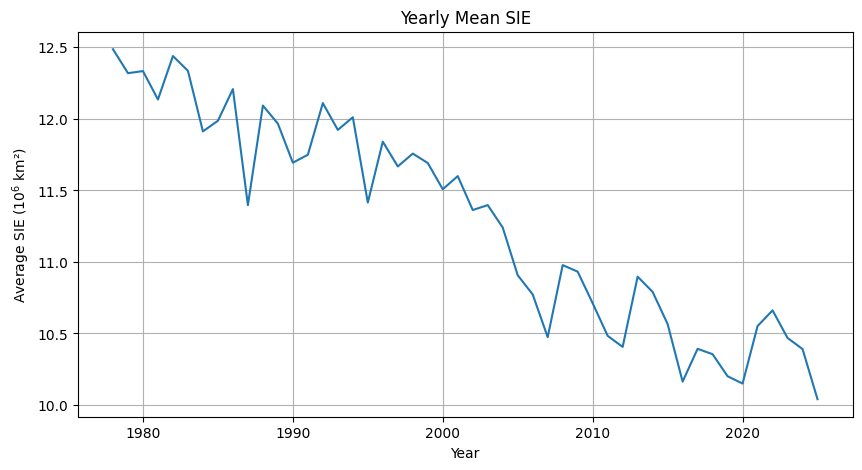

In [10]:
plot_xy(
    x=yearly_df["Year"],
    y=yearly_df["Extent"],
    plot_type="line",
    title="Yearly Mean SIE",
    xlabel="Year",
    ylabel="Average SIE ($10^6$ km²)"
)

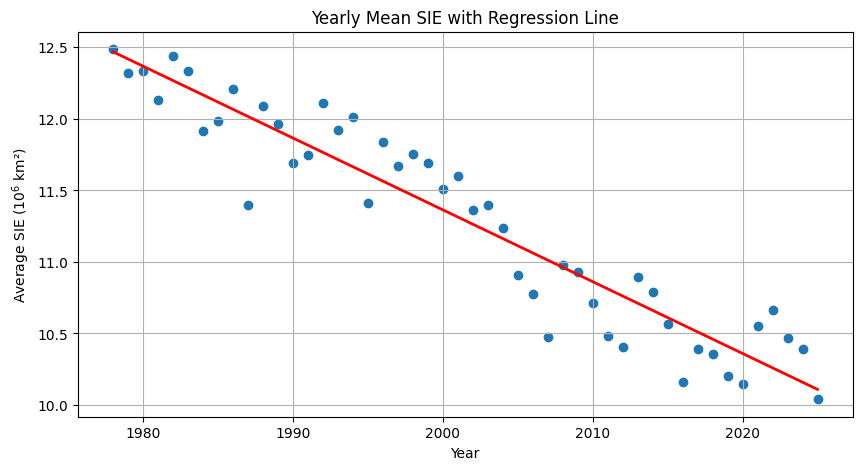

In [9]:
plot_xy(
    x=yearly_df["Year"],
    y=yearly_df["Extent"],
    plot_type="scatter",
    title="Yearly Mean SIE with Regression Line",
    xlabel="Year",
    ylabel="Average SIE ($10^6$ km²)",
    regression_line=True
)

- Clear linear decrease in SIE averaged over each year --> supports using linear regression to predict yearly SIE

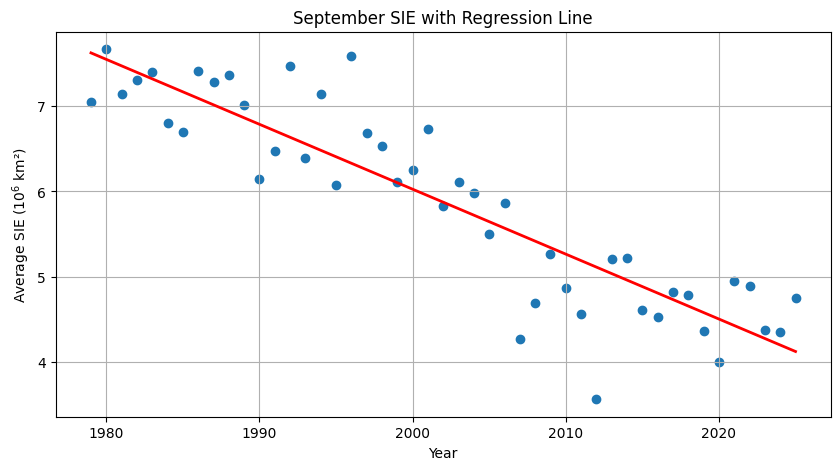

In [26]:
#analysing linear trend in Setember over each year
sept_df = monthly_df[monthly_df["Month"] == 9]

plot_xy(
    x=sept_df["Year"],
    y=sept_df["Extent"],
    plot_type="scatter",
    title="September SIE with Regression Line",
    xlabel="Year",
    ylabel="Average SIE ($10^6$ km²)",
    regression_line=True
)

- Higher variability than with yearly averaged but again a clear decrease in SIE over each year 

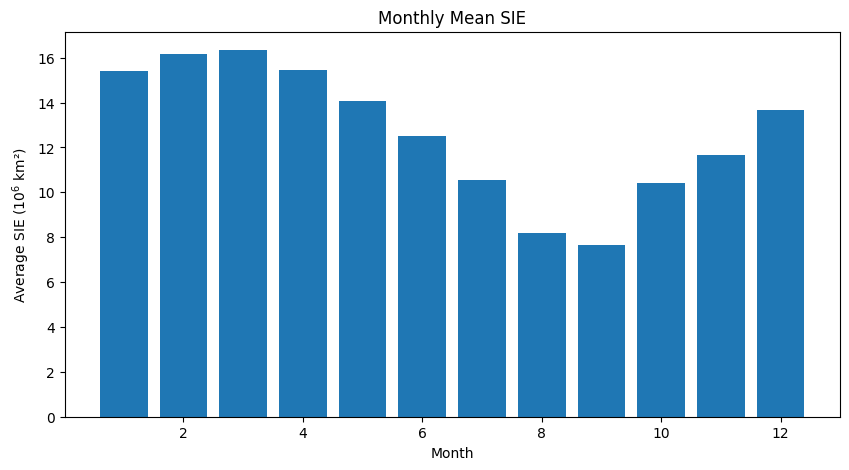

In [12]:
plot_xy(
    x=monthly_df["Month"],
    y=monthly_df["Extent"],
    plot_type="bar",
    title="Monthly Mean SIE",
    xlabel="Month",
    ylabel="Average SIE ($10^6$ km²)"
)

- Can see a reduction in SIE from March to September, followed by a consistent increase until March again --> month is a key predictor when modelling monthly averaged data

# Land-Ocean Northern Hemispheric Mean Temperature Anomolies

In [3]:
temp_df = pd.read_csv("../data/NH.Ts+dSST.csv", skiprows=1) #skipping header row
print(temp_df.head())

print(temp_df["Year"].min(), temp_df["Year"].max())

   Year   Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov  \
0  1880 -0.37 -0.53 -0.24 -0.31 -0.07 -0.18 -0.20 -0.28 -0.25 -0.33 -0.44   
1  1881 -0.31 -0.23 -0.04  0.00  0.03 -0.34  0.07 -0.05 -0.27 -0.44 -0.37   
2  1882  0.26  0.21  0.01 -0.32 -0.25 -0.31 -0.29 -0.16 -0.25 -0.53 -0.33   
3  1883 -0.58 -0.66 -0.16 -0.29 -0.24 -0.13 -0.04 -0.23 -0.33 -0.16 -0.42   
4  1884 -0.17 -0.09 -0.63 -0.60 -0.37 -0.43 -0.40 -0.50 -0.45 -0.45 -0.58   

    Dec   J-D   D-N   DJF   MAM   JJA   SON  
0  -.41  -.30   ***   *** -0.21 -0.22 -0.34  
1  -.24  -.18  -.20  -.32 -0.01 -0.11 -0.36  
2  -.68  -.22  -.18   .08 -0.19 -0.25 -0.37  
3  -.15  -.28  -.33  -.64 -0.23 -0.13 -0.30  
4  -.48  -.43  -.40  -.14 -0.53 -0.44 -0.49  
1880 2025


- Data shows the monthly and yearly Northern Hemispheric land-ocean surface temperature anamolies from 1880 to 2025

### Merging SIE DataFrames with Temperature Data

In [4]:
yearly_SIE = merge_temperature_data(yearly_df, temp_df, ["J-D"], ["Temp Anomaly"])
print("Yearly SIE merged with Temperature Data:\n",yearly_SIE.head())

temp_long = temp_df.copy()
temp_long = temp_long.melt(
    id_vars="Year", 
    value_vars = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],
    var_name="Month", 
    value_name="Temp Anomaly"
)

temp_long["Month"] = temp_long["Month"].map({
    "Jan": 1,
    "Feb": 2,
    "Mar": 3,
    "Apr": 4,
    "May": 5,
    "Jun": 6,
    "Jul": 7,
    "Aug": 8,
    "Sep": 9,
    "Oct": 10,
    "Nov": 11,
    "Dec": 12
})

monthly_SIE = merge_temperature_data(monthly_df, temp_long, ["Temp Anomaly"])
print("Monthly SIE merged with Temperature Data:\n",monthly_SIE.head())

Yearly SIE merged with Temperature Data:
    Year     Extent  Temp Anomaly
0  1978  12.487000          0.02
1  1979  12.319560          0.08
2  1980  12.334148          0.17
3  1981  12.135486          0.37
4  1982  12.439445          0.05
Monthly SIE merged with Temperature Data:
    Year  Month     Extent  Temp Anomaly
0  1978     10  10.402667          0.00
1  1978     11  11.645133          0.16
2  1978     12  13.667063          0.02
3  1979      1  15.414000         -0.05
4  1979      2  16.175286         -0.36


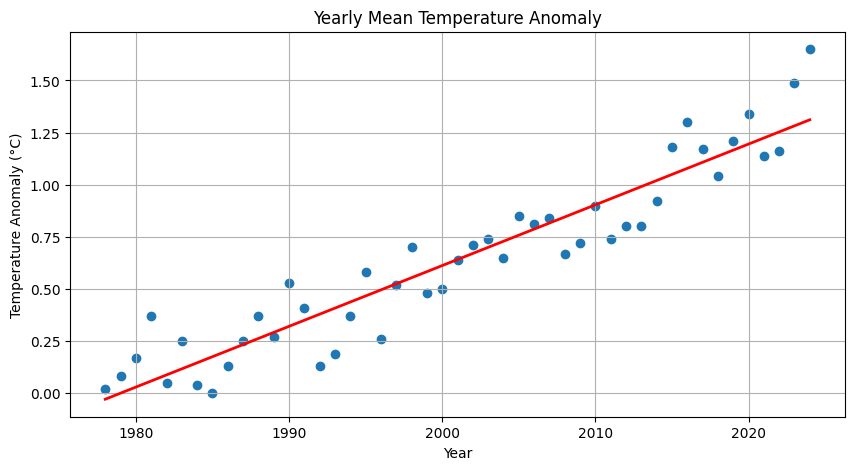

In [5]:
plot_xy(
    x=yearly_SIE["Year"], 
    y=yearly_SIE["Temp Anomaly"],
    plot_type="scatter",
    title="Yearly Mean Temperature Anomaly",
    xlabel="Year",
    ylabel="Temperature Anomaly (°C)",
    regression_line=True
)

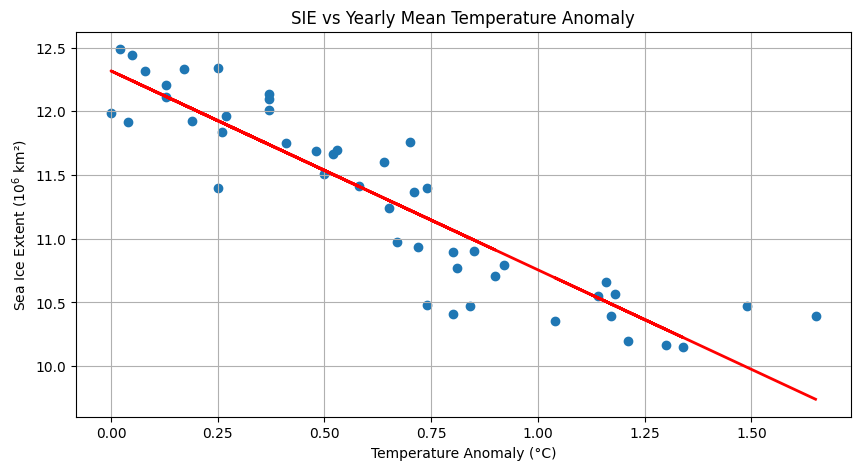

In [6]:
plot_xy(
    x=yearly_SIE["Temp Anomaly"], 
    y=yearly_SIE["Extent"],
    plot_type="scatter",
    title="SIE vs Yearly Mean Temperature Anomaly",
    xlabel="Temperature Anomaly (°C)",
    ylabel="Sea Ice Extent ($10^6$ km²)",
    regression_line=True
)

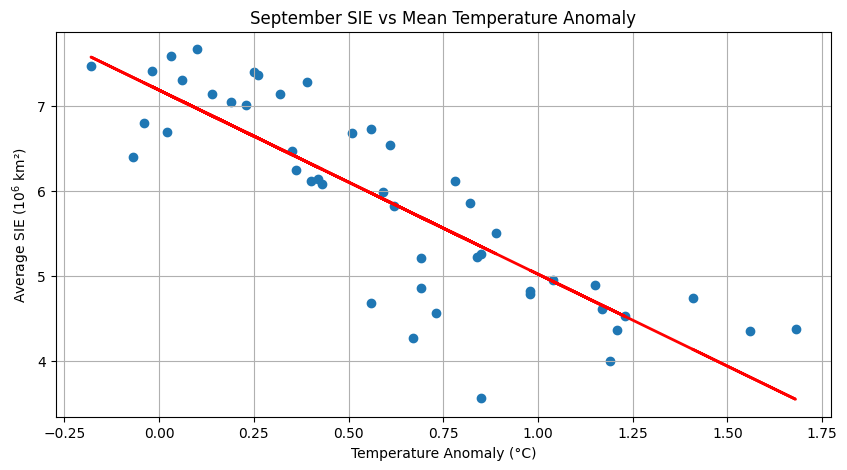

In [7]:
sept_DF = monthly_SIE[monthly_SIE["Month"] == 9]

plot_xy(
    x=sept_DF["Temp Anomaly"],
    y=sept_DF["Extent"],
    plot_type="scatter",
    title="September SIE vs Mean Temperature Anomaly",
    xlabel="Temperature Anomaly (°C)",
    ylabel="Average SIE ($10^6$ km²)",
    regression_line=True
)

- HI

# Global CO2 concentration